# Suites récurrentes linéaires à coefficients constants

L'objectif de ce TP est de découvrir comment utiliser SageMath pour étudier des suites définies par récurrence. Un exemple parmi d'autres est la célèbre suite de Fibonacci. La complexité des algorithmes récursifs, définie par une équation de récurrence, est un autre exemple très fréquent. Savoir étudier ces suites est très utile en informatique.

Le sujet présente des aspects numériques (calculer les termes), graphiques (représenter la suite), symboliques (trouver une formule), etc.

On commence par l'étude des approches possibles pour la suite de Fibonacci, puis on généralise pour les suites récurrentes linéaires à coefficients constants, c'est-à-dire de suites $(u_n)_n$ définies par
$$ u_{n+k} = a_0u_n + a_1u_{n+1} + \dotsb + a_{k-1}u_{n-k+1}.$$

## Étude numérique de la suite de Fibonacci
On définit la suite de Fibonacci $(F_n)$ par $F_0 = 0$, $F_1 = 1$ et $F_{n+2} = F_{n+1} + F_n$.

### Question
1. Écrire une fonction récursive `fibonacci` qui calcule le $n$-ème terme de la suite de Fibonacci directement grâce à la formule précédente.
1. Calculer les dix premiers termes. 
1. Essayer de calculer le 100-ème terme : expliquer.

In [1]:
def fibonacci(n) :
    if (n < 2) :
        return n
    else :
        return (fibonacci(n-1) + fibonacci(n-2))

show(fibonacci(10))

55

In [2]:
for i in range(10) :
    print(fibonacci(i))

0
1
1
2
3
5
8
13
21
34


In [3]:
#fibonacci(100)
%time fibonacci(35)

CPU times: user 9.08 s, sys: 0 ns, total: 9.08 s
Wall time: 9.08 s


9227465

### Question
1. Réécrire la fonction `fibonacci` de manière plus intelligente pour calculer rapidement le $n$-ème terme.
1. Tester avec $n = 100$, $1000$, $10000$.
1. Trouver approximativement la valeur $n$ pour laquelle le calcul de $F_n$ prend environ 1 seconde. Ne pas afficher la valeur de $F_n$ mais son nombre de chiffres (avec la méthode `ndigits` des entiers). *On peut utiliser `%time` pour mesurer le temps de calcul.*

In [4]:
def fibonacci2(n) :
    if( n == 0):
        return 0
    else:
        x = 0
        y = 1
        for i in range(1,n):
            z = (x + y)
            x = y
            y = z
        return y



In [5]:
print(fibonacci2(100))
#print(fibonacci2(1000))
#print(fibonacci2(10000))

354224848179261915075


In [6]:
%time fibonacci2(655000)

CPU times: user 1.61 s, sys: 1.45 ms, total: 1.61 s
Wall time: 1.61 s


3588217284761327260559563252875520172840143662477512307903553850746794875625830999662558322261797281017791862214517437366968144741097997154841798776120992946699279911902507094349082627658670504901253832448979949345442358108074241059403994301659468199628418326514863338813168954617067410484225129189361152941511603150675710760619244172656980139460126379118810046566792763106649298949713099727188760070371444667328945726921510991487264501668970696052608097185505815095878327777641791902273724135118512797569618539605267041858127183246268682150152742784348573948178924858535312228408360067034599640920508482778351958422943927829690468795088646619030481996961216086629283464063182992405786593195962626152539315471224806684449962702579557350267489110615578539141497107129109336402196822308209995948114723104786276419140526532346886873192962337743678018319315410142786784923846046926049214987214070251038054793937853312217057744458499721698147913238449383928937932861707802266484474566766430631771466661180

### Question
1. Écrire une fonction `liste_fibonacci` qui prend en entrée $n$ et calcul la liste des $F_k$ pour tout $k < n$. _**Ne pas** utiliser la fonction `fibonacci` !_
1. En utilisant `list_plot`, représenter les 100 premiers termes de la suite de Fibonacci.

In [7]:
def liste_fibonacci(n) :
    T = [0,1]
    if( n < 2):
        return T
    else:
        for i in range(2,n):
            T.append((T[i-1] + T[i-2]))
        return T

show(liste_fibonacci(10))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

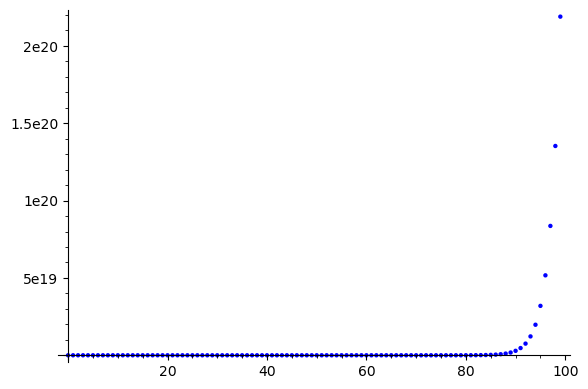

In [8]:
list_plot(liste_fibonacci(100))

### Question
1. Calculer la liste des valeurs $L_k = \log_2(F_k)$ pour $0 < k < 1000$.
1. Représenter graphiquement ces valeurs. Que peut-on conjecturer ?

In [9]:
 L1000 = liste_fibonacci(100)
L1000.pop(0)
#show(L1000)
Lk = [log(i,2) for i in L1000]
#show(Lk) 

### Question
La fonction `find_fit` permet de calculer (une approximation de) la fonction définie par les valeurs calculées. Pour cela, on définit un *modèle*, qui est la forme de la fonction voulue : ici on prend une fonction linéaire $f(x) = ax+b$ où $a$ et $b$ sont des inconnues. Ensuite on fournit un ensemble de couples $(x,y)$ et le modèle à `find_fit`, qui cherche alors les valeurs de $a$ et $b$ qui fournissent la meilleure solution.
1. Définir les variables symboliques `x`, `a` et `b` et la fonction symbolique $f(x) = ax+b$. 
2. Calculer l'ensemble des couples, et appliquer `find_fit` pour trouver $a$ et $b$.

In [10]:
var ('a b x')
f(x) = a*x + b

In [11]:
def couplesXY(n) :
    L = []
    for i in range (1,n) :
        L.append((i,numerical_approx(log(fibonacci2(i),2))))
    return L
couple = find_fit(couplesXY(100),f)
show(find_fit(couplesXY(100),f))

[a == 0.694061585174734, b == -1.148969524693271]

### Question
1. Récupérer les valeurs des coefficients `a` et `b` calculés : `expr.rhs()` fournit le terme de droite d'une égalité (*right-hand side*).
2. Définir une fonction symbolique $F(x)$ qui approche la suite de Fibonacci pour les valeurs entières de $x$. *Chercher à donner l'expression la plus simple possible pour $F$. Attention: a et b ont été calculés à partir du logarithme des valeurs de Fibonacci.*
3. Représenter graphiquement $F$ et la suite de Fibonacci pour comparer. *Utiliser des couleurs différentes.*


In [12]:
a = couple[0].rhs()
b = couple[1].rhs()

In [13]:
def fibo(x) :
    return (2**(a*x+b))
fibo(10)

55.393558941376334

x |--> 2^(0.694061585174734*x - 1.148969524693271)

55.393558941376334

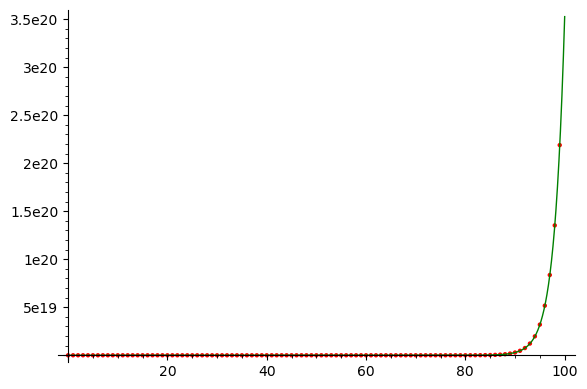

In [14]:
 F(x) = 2^(a*x+b)
show(F)
show(F(10))

plot(F(x), (0,100), color='green')+list_plot(liste_fibonacci(100), color='red')

## Calcul exact de la suite de Fibonacci
Dans la première partie, on a vu comment trouver une valeur approximative de la suite. On cherche maintenant une expression la plus exacte possible de $F_n$ en fonction de $n$, toujours en utilisant les capacités de calcul de SageMath.

### Question
On a vu que $F_n$ a une croissance exponentielle. Pour trouver une formule pour $F_n$, on commence par chercher les valeurs de $\alpha$ telles que $\alpha^n$ satisfasse l'équation de récurrence de $F_n$, sans s'occuper des cas de base.
1. Définir les variables $n$ et $\alpha$, et écrire l'équation qu'on souhaite résoudre sur $\alpha$.
2. Utiliser `solve` pour trouver les solutions de l'équation. *Si nécessaire, aider SageMath en écrivant l'équation sous la forme `... == 0`, et en factorisant l'équation à l'aide de `factor` avant de demander la résolution.*
3. Vérifier que $\alpha^n$ satisfait bien l'équation de récurrence, pour chacune des solutions $\alpha$ trouvées. *Pour forcer SageMath à vérifier une équation, on peut utiliser `bool(...)`.*

In [15]:
var('a n')

(a, n)

In [16]:
eq = a**n == a**(n-1) + a**(n-2)

In [17]:
show(solve(eq, a,n))

[[a == 1/2*sqrt(5) + 1/2, n == r1], [a == -1/2*sqrt(5) + 1/2, n == r2]]

In [18]:
equation = solve(eq, a,n)
eqa = equation[0][0].rhs()
eqb = equation[1][0].rhs()
bool(eqa**n == eqa**(n-1) + eqa**(n-2))
bool(eqb**n == eqb**(n-1) + eqb**(n-2))


True

### Question
On a trouvé des solutions qui satisfont l'équation de récurrence, mais sans faire attention aux conditions initiales.
1. Est-ce que l'une des solutions $\alpha^n$ satisfait les conditions initiales de la suite de Fibonacci ?
2. Vérifier que si on a deux solutions $\alpha_1^n$ et $\alpha_2^n$, alors toute *combinaison linéaire* de ces deux solutions satisfait l'équation de récurrence. *Pour cela, définir des variables symboliques $c_1$ et $c_2$ et vérifier que $c_1\alpha_1^n+c_2\alpha_2^n$ satisfait la récurrence.*
3. On cherche $c_1$ et $c_2$ telles que $c_1\alpha_1^n+c_2\alpha_2^n$ satisfasse les conditions initiales. Écrire l'équation correspondante et la résoudre à l'aide de `solve`.

In [19]:
var('c1 c2')
bool(c1*eqa^n + c2*eqb^n == c1*eqa^(n-1) + c2*eqb^(n-1) + c1*eqa^(n-2) + c2*eqb^(n-2))

True

In [20]:
eq1 = c1*eqa^1 + c2*eqb^1 == 1
eq2 = c1 + c2 == 0

solve([eq1, eq2], c1, c2)

[[c1 == 1/5*sqrt(5), c2 == -1/5*sqrt(5)]]

### Question
1. D'après les résultats précédents, définir une fonction $G$ telle que $G(n) = F_n$ pour tout $n$.
2. Vérifier que la fonction trouvée est correcte, pour tout $n < 100$.
3. Tracer $F(n)/G(n)$ pour $n = 1$ à $100$, où $F$ est la fonction numérique définie à la question **1.6.**, et vérifier que la fonction $F$ était à peu près correcte.

## Suites récurrentes linéaires à coefficients constants

Dans cette partie, on essaie de répéter les mêmes étapes que celles effectuées pour la suite de Fibonacci, mais avec une suite récurrente linéaire quelconque. De manière générale, une telle suite $(u_n)_{n\ge 0}$ est définie par $k$ valeurs $u_0$, ..., $u_{k-1}$ et une récurrence d'*ordre $k$* de la forme
$$u_{n+k} = a_0u_{n}+a_1u_{n+1}+\dotsb +a_{k-1}u_{n+k-1}$$
pour $n\ge 0$. Ainsi la suite récurrente $(u_n)$ d'*ordre $k$* est définie par 
- les $k$ *conditions initiales* $u_0$, ..., $u_{k-1}$;
- les $k$ coefficients de l'*équation de récurrence* $a_0$, ..., $a_{k-1}$.


### Question
Identifier l'ordre $k$, les conditions initiales et les coefficients de l'équation de récurrence, dans le cas de la suite de Fibonacci.

### Question
1. Écrire une fonction `suivant`, qui prend en entrée une liste de $k$ termes $u_n$, ..., $u_{n+k-1}$ et la liste des $k$ coefficients $a_0$, ..., $a_{k-1}$, et renvoie le terme $u_{n+k}$. *Vous devez vérifier que les deux listes sont de même taille.*
2. En déduire une fonction `liste_termes` qui prend en entrée des conditions initiales et les coefficients de l'équation de récurrence d'une suite $(u_n)$, ainsi qu'un entier $N$, et renvoie la liste $[u_0, ..., u_N]$.
3. Vérifier votre fonction en l'appliquant à la suite de Fibonacci et comparant au résultat renvoyé par `liste_fibonacci`.

In [21]:
def suivant(termes, coef) :
    if(len(coef) != len(termes)) :
        print("Les tailles doivent être similaires")
        return 0
    res = 0;
    for i in range(0,len(coef)) :
        res += coef[i] * termes[i]
    return res

lTermes = [1,4,6,8]
lCoef = [1,3,5,7]

suivant(lTermes, lCoef)

99

In [22]:
def liste_termes(termes, coef, N) :
    if(N > len(coef)) :
        print("N doit être inférieur au nombre de coef")
    else :
        res =0
        for i in range(0, N) :
            res += coef[i] * termes[i]
        return res

N = 4
liste_termes(lTermes, lCoef, N)


99

In [23]:
liste_fibonacci(liste_termes(lTermes, lCoef, N))

[0,
 1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765,
 10946,
 17711,
 28657,
 46368,
 75025,
 121393,
 196418,
 317811,
 514229,
 832040,
 1346269,
 2178309,
 3524578,
 5702887,
 9227465,
 14930352,
 24157817,
 39088169,
 63245986,
 102334155,
 165580141,
 267914296,
 433494437,
 701408733,
 1134903170,
 1836311903,
 2971215073,
 4807526976,
 7778742049,
 12586269025,
 20365011074,
 32951280099,
 53316291173,
 86267571272,
 139583862445,
 225851433717,
 365435296162,
 591286729879,
 956722026041,
 1548008755920,
 2504730781961,
 4052739537881,
 6557470319842,
 10610209857723,
 17167680177565,
 27777890035288,
 44945570212853,
 72723460248141,
 117669030460994,
 190392490709135,
 308061521170129,
 498454011879264,
 806515533049393,
 1304969544928657,
 2111485077978050,
 3416454622906707,
 5527939700884757,
 8944394323791464,
 14472334024676221,
 23416728348467685,
 37889062373143906,
 61305790721611591,
 99194853094755497,
 16050

### Question
Soit $(u_n)$ définie par $u_{n+5} = 3u_{n+2} + u_n$, avec $u_0 = u_1 = u_2 = u_3 = u_4 = 1$.
1. Calculer les 100 premiers termes de la suite $(u_n)$.
1. Représenter graphiquement ces points, et éventuellement leur logarithme.
1. Déterminer numériquement, comme on l'a fait pour la suite de Fibonacci, deux constantes $c$ et $\alpha$ telles que $u_n$ soit environ égal à $c \alpha^n$. *Utiliser le graphique, puis `find_fit`.
1. Superposer le tracé de la fonction $f(n) = c\alpha^n$ avec les points calculés, pour vérifier que le résultat est  peu près correct.

In [24]:
def Suite100() :
    L = []
    for i in range(100) :
        if (i <= 4) :
            L.append(1)
        else :
            L.append(3* L[i-3] + L[i-5])
    return L

show(Suite100())

L1 = Suite100()
def Suite100Log(liste) :
    L = []
    for i in range(100) :
        L.append(log(liste[i],10))
    return L

L1_log = Suite100Log(L1)

[1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 13,
 13,
 16,
 43,
 43,
 61,
 142,
 145,
 226,
 469,
 496,
 820,
 1552,
 1714,
 2929,
 5152,
 5962,
 10339,
 17170,
 20815,
 36169,
 57472,
 72784,
 125677,
 193231,
 254521,
 434503,
 652477,
 889240,
 1496740,
 2211952,
 3102223,
 5142697,
 7525096,
 10803409,
 17640043,
 25677511,
 37552924,
 60445225,
 87835942,
 130298815,
 207013186,
 301060750,
 451341670,
 708875500,
 1033481065,
 1561038196,
 2427687250,
 3551784865,
 5391990088,
 8316542815,
 12216392791,
 18603657514,
 28501413310,
 42041168461,
 64127515357,
 97720632721,
 144727162897,
 220883959381,
 335203066624,
 498309004048,
 760372510864,
 1150336362769,
 1715810971525,
 2616320599216,
 3949318092355,
 5907805425439,
 8999298160417,
 13563765248590,
 20339736875533,
 30947212573606,
 46599101171209,
 70018508787016,
 106405402969408,
 160137040389160,
 241002738934654,
 365815310079433,
 550429629954496,
 829413619773370,
 1257582970627459,
 1892291628798142,
 2854056169399543,
 4323178541836873,
 6506288506167796,
 9819751478826088,
 14861827254308761,
 22372921687902931,
 33782432978315137,
 51091770269094079,
 76938516542534881,
 116209126189254172,
 175648232495185168]

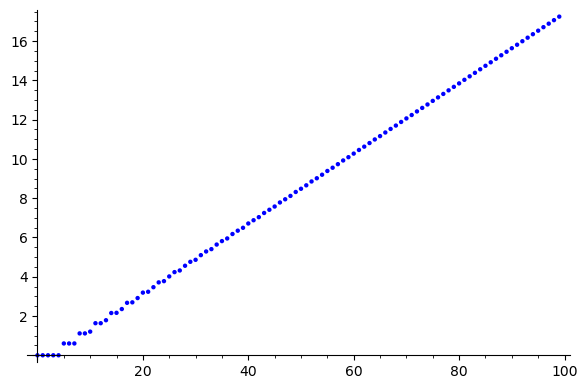

In [25]:
list_plot(Suite100())
list_plot(L1_log)

In [26]:
var ('a, b')
f(x) = a*x + b
x=0
L3 = []
for y in L1_log:
    L3.append((x,y))
    x = x+1
    
solu = find_fit(L3, f)
solu



[a == 0.1785235752220349, b == -0.4395058763425565]

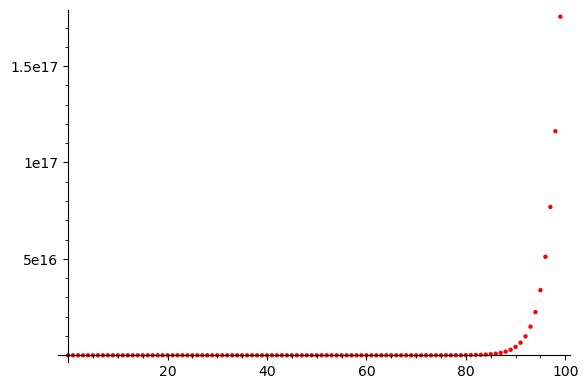

In [27]:
a = solu[0].rhs()
b = solu[1].rhs()
alpha = 2^a
c = 2^b

F(n) = c*alpha^n
list_plot(L1, color="red")

## Calcul exact de suites récurrentes linéaires à coefficients constants
Mathématiquement, on sait résoudre complètement les suites récurrentes à coefficients constants. Si $(u_n)$ vérifie $u_{n+k} = a_0u_{n}+a_1u_{n+1}+\dotsb +a_{k-1}u_{n+k-1}$, on définit le *polynôme caractéristique* de $(u_n)$ par $P_u(X) = X^k - (a_{k-1} X^{k-1} + a_{k-2} X^{k-2} + \dotsb a_1 X + a_0)$. Ses racines permettent de trouver le terme général de la suite.

### Question
1. Définir l'anneau des polynômes en une variable à coefficients rationnels, avec la commande `R.<X> = QQ[]`.
1. Écrire une fonction `poly_car` qui, étant donné les coefficients $a_0$, …, $a_{k-1}$ d'une suite récurrente linéaire, renvoie le polynôme caractéristique de cette suite.
1. Calculer le polynôme caractéristique $P_F$ de la suite de Fibonacci. Calculer ses racines. *Remarque : le polynôme n'a pas de racines rationnelles, il faut donc calculer ses racines dans un ensemble plus grand avec `P_F.roots(...)`, où les `...` doivent être remplacés par le bon ensemble.*
1. Calculer de même le polynôme caractéristique de la suite de la question précédente ($u_{n+5} = 3u_{n+2}+u_n$) ainsi que ses racines (de manière approchée). Quelle valeur calculée précédemment retrouvez-vous approximativement ?

In [28]:
R.<X> = QQ[]

In [29]:
def poly_car(coef) :
    res = 0 
    for i in range(len(coef)) :
        res += coef[i] * X^i
    return X^len(coef) - res

show(poly_car(lCoef))

X^4 - 7*X^3 - 5*X^2 - 3*X - 1

In [30]:
P_F = poly_car([1,1])
rac = P_F.roots(RR)
show(rac)

[(-0.618033988749895, 1), (1.61803398874989, 1)]

In [31]:
P_n = poly_car([1,0,3,0,0])
U_n = P_n.roots(RR)
U_n

[(1.50941045653627, 1)]

### Question
La théorie des suites récurrentes linéaires à coefficients constants fournit la valeur de $u_n$ en fonction des racines de son polynôme caractéristique $P$. Si le polynôme possède $k$ racines distintes $r_1$, …, $r_k$, alors $u_n = c_1 r_1^n + c_2 r_2^n + \dotsb + c_kr_k^n$. Les coefficients $c_i$ sont déterminés par les valeurs initiales de la suite, $u_0$ à $u_{k-1}$.
1. Écrire une fonction `terme_general` qui prend en entrée les coefficients $a_0$, …, $a_{k-1}$ d'une suite récurrente linéaire, et renvoie le terme général de la suite *si toutes les racines de son polynôme caractéristique sont distinctes* (c'est-à-dire de multiplicité $1$). Si le polynôme caractéristique n'a pas que des racines simples, on soulèvera une exception avec `raise ValueError("le polynôme a des racines multiples")`. _**Remarque importante.** La fonction ne prend pas en entrée les valeurs initiales : elle doit donc renvoyer une expression avec des variables symboliques $c_i$. Pour en définir $k$ d'un coup (ici $4$), il faut créer une chaîne de caractère `"c0 c1 c2 c3"` puis appeler `c = var("c0 c1 c2 c3")` : on obtient `c3` avec `c[3]` par exemple._
1. Tester la fonction avec la suite de Fibonacci, et la suite $u_{n+5} = 3u_{n+2} + u_n$.

In [32]:
def terme_general(listCoeff):
    P = poly_car(listCoeff)
    roots = P.roots()
    if roots == []:
        roots = P.roots(SR)
        if roots == []:
            roots = P.roots(CC)
    for root in roots:
        if root[1] != 1:
            raise ValueError("le polynôme a des racines multiples")
    c = ""
    for i in range(len(roots)):
        c += "c" + str(i) + " "
    c = c[0:-1] + " n"
    c = var(c)
    u(n) = 0
    for i in range(len(roots)):
        u(n) = u + c[i]*(roots[i][0]^n)
    return u

In [33]:
fib = terme_general([1,1])
show(fib)

u = terme_general([1,0,3,0,0])
show(u)

n |--> c1*(1/2*sqrt(5) + 1/2)^n + c0*(-1/2*sqrt(5) + 1/2)^n

n |--> c0*e^(0.411719148455786*n) + c2*e^((0.347394772487646 + 2.14831474661924*I)*n) + c1*e^((0.347394772487646 - 2.14831474661924*I)*n) + c4*e^(-(0.553254346715540 - 1.53946660211288*I)*n) + c3*e^(-(0.553254346715540 + 1.53946660211288*I)*n)

In [34]:
fib2 = fib.subs(c0 == -sqrt(5)/5, c1 == sqrt(5)/5)


In [35]:
fib2(15).n()

610.000000000000

### Question
Afin d'obtenir la valeur finale de $u_n$, il faut prendre en compte les conditions initiales $u_0$, …, $u_{k-1}$. Pour cela, si on a trouvé une fonction $U(n)$ avec des variables symboliques $c_i$, il faut résoudre $U(i) = u_i$ pour $i =0$ à $k-1$ pour trouver les valeurs des $c_i$.
1. À la main, résoudre les équations pour la suite de Fibonacci, et trouver l'expression de $F_n$. L'évaluer sur $n=0$ à $10$ pour vérifier que c'est correct.
1. Écrire une fonction `conditions_initiales` qui prend en entrée l'expression renvoyée par `terme_general` et la liste $[u_0, \dots, u_{k-1}]$ des conditions initiales, et renvoie l'expression modifiée en remplaçant les $c_i$ par leurs valeurs. *On peut obtenir la liste des variables d'une expression avec `expr.variables()`.*
1. Appliquer la fonction sur le terme général de Fibonacci et de la suite $u_{n+5} = 3u_{n+2} + u_n$ avec $u_k = 1$ pour $k < 5$.
1. Vérifiez qu'on retrouve bien (environ) les bonnes valeurs des suites. Comment expliquer que les valeurs ne soient pas tout à fait correctes ?

In [36]:
cond1 = (fib(0) == 0)
cond2 = (fib(1) == 1)
cond = [cond1, cond2]
show(cond)
sol = solve(cond, c0, c1)
cZero = sol[0][0].rhs()
cUn = sol[0][1].rhs()
fib2 = fib.subs(c0 == cZero, c1 == cUn)
show(fib2(5).n())

[c0 + c1 == 0, 1/2*c1*(sqrt(5) + 1) - 1/2*c0*(sqrt(5) - 1) == 1]

5.00000000000000

In [37]:
def conditions_initiales(formule, listeCond):
    cond = [(formule(i) == listeCond[i]) for i in range(len(listeCond))]
    listeVar = formule.variables()
    sol = solve(cond, listeVar)[0]
    form = formule
    for i in range(len(cond)):
        form = form.subs(listeVar[i] == sol[i].rhs())
    return form

show(conditions_initiales(terme_general([1,1]), [0,1]))
u = conditions_initiales(terme_general([1,0,3,0,0]), [1,1,1,1,1])

n |--> 1/5*sqrt(5)*(1/2*sqrt(5) + 1/2)^n - 1/5*sqrt(5)*(-1/2*sqrt(5) + 1/2)^n

### Question
Quand les racines du polynôme caractéristique d'une suite ne sont pas toutes distinctes, l'expression de $u_n$ est un peu différente. En supposant que le polynôme caractéristique $P$ de la suite $(u_n)$ admette $t$ racines $r_1$, …, $r_t$ de multiplicités $m_1$, …, $m_t$, alors $u_n = p_1(n) r_1^n + p_2(n) r_2^n + … + p_t(n) r_t^n$ où $p_i(n)$ est un polynôme de degré $< m_i$. Donc $p_i(n)$ peut s'écrire $c_0 + c_1 x + c_2 x^2 + \dotsb + c_{m_i-1} x^{m_i-1}$.

1. Reprendre la fonction `terme_général` pour qu'elle fonctionne avec des polynômes à racines multiples. *Remarque : le nombre de variables symboliques nécessaires reste toujours le même, à savoir $k$.*
1. Vérifier qu'elle fonctionne toujours pour les deux suites étudiées.
1. Tester la fonction avec la suite $(v_n)$ définie par $v_{n+2} = 2v_{n+1}-v_n$.

In [38]:
 def terme_general2(listCoeff):
    P = poly_car(listCoeff)
    roots = P.roots()
    if roots == []:
        roots = P.roots(SR)
        if roots == []:
            roots = P.roots(CC)
    c = ""
    nbVar = 0
    for root in roots:
        nbVar += root[1]
    for i in range(nbVar):
        c += "c" + str(i) + " "
    c = c[0:-1]
    c = var(c)
    var('n')
    u(n) = 0
    ind = 0
    for i in range(len(roots)):
        if roots[i][1] == 1:
            u(n) = u + c[ind]*(roots[i][0]^n)
            ind += 1
        else:
            p(n) = 0
            for j in range(roots[i][1]):
                p = p + c[ind]*(n^j)
                ind += 1
            u(n) = u + p*(roots[i][0]^n)
    return u

In [39]:
show(conditions_initiales(terme_general2([1,1]), [0,1]))

n |--> 1/5*sqrt(5)*(1/2*sqrt(5) + 1/2)^n - 1/5*sqrt(5)*(-1/2*sqrt(5) + 1/2)^n

In [40]:
v = terme_general2([-1,2])
show(v)

n |--> c1*n + c0

### Question
1. En adaptant si besoin la fonction `conditions_initiales` pour qu'elle fonctionne quand les polynômes caractéristiques ont des racines multiples, écrire une fonction `resolution` qui prend en entrée les coefficients $a_0$, …, $a_k$ d'une suite récurrente linéaire et les conditions initiales $u_0$, …, $u_{k-1}$, et renvoie l'expression de $u_n$ en fonction de $n$.

1. Appliquer la fonction `resolution` dans les cas suivants, et vérifier à chaque fois si l'expression produit bien les bonnes valeurs de la suite :
    - suite de Fibonacci ;
    - suite $u_{n+5} = 3u_{n+2} + u_n$ avec $u_k = 1$ pour $k < 4$ ;
    - suite $v_{n+2} = 2v_{n+1}-v_n$ avec $v_0 = 1$ et $v_1 = -1$ ;
    - suite $w_{n+3} = 3w_{n+1}+2w_n$ avec $w_k = k$ pour $k < 3$.

In [41]:
def resolution(listeCoeff, listeCond):
    return conditions_initiales(terme_general2(listeCoeff), listeCond)

In [42]:
fib = resolution([1,1], [0,1])
u = resolution([1,0,3,0,0], [1,1,1,1,1])
v = resolution([-1,2], [1,-1])
w = resolution([2,3,0], [1,2,3])
LFib = liste_termes([0,1], [1,1], 1000)
Lu = liste_termes([1,1,1,1,1], [1,0,3,0,0], 1000)
Lv = liste_termes([1,-1], [-1,2], 1000)
Lw = liste_termes([1,2,3], [2,3,0], 1000)

N doit être inférieur au nombre de coef
N doit être inférieur au nombre de coef
N doit être inférieur au nombre de coef
N doit être inférieur au nombre de coef


In [43]:
def compare(listT, func):
    for i in range(len(listT)):
        div = RR(listT[i])/RR(CC(func(i)).real().n())
        if div > 1.0000000001 or div < 0.9999999999:
            return False
    return True

In [44]:
show(compare(LFib, fib))
show(compare(Lu, u))
show(compare(Lv, v))
show(compare(Lw, w))

TypeError: object of type 'NoneType' has no len()

## Calcul rapide de suites récurrentes linéaires

On a trouvé dans la partie **1.** la valeur maximale de $n$ pour laquelle on arrive à calculer le $n$^ème^ terme de la suite de Fibonacci. L'objectif de cette partie est d'accélérer ces calculs.

### Question
Pour accélérer les calculs (pour une suite récurrente quelconque), on remarque que l'équation $u_{n+k} = a_0u_n+\dotsb+a_{k-1}u_{n+k-1}$ s'écrit de la manière matricielle suivante :
$$\begin{pmatrix} u_{n+1}\\u_{n+2}\\\vdots\\u_{n+k-1}\\u_{n+k}\end{pmatrix} 
 = \begin{pmatrix}
     0 & 1 & 0 & \dots & 0 \\
     0 & 0 & 1 & \dots & 0 \\
       &   &   & \ddots\\
     0 & 0 & 0 & \dots & 1 \\
     a_0 & a_1 & a_2 & \dots & a_{k-1}
   \end{pmatrix}
 \begin{pmatrix} u_{n}\\u_{n+1}\\\vdots\\u_{n+k-2}\\u_{n+k-1}\end{pmatrix} $$
 
 1. Écrire une fonction `matrice` qui prend en entrée les coefficients d'une équation de récurrence et renvoie la matrice correspondante. *La construction `matrix(n,n)` construit une matrice de dimensions $n\times n$ remplie de $0$.*
 1. Utiliser la matrice pour calculer les 10 premiers termes de la suite de Fibonacci, et vérifier qu'on obtient bien le bon résultat. *Il faut faire un produit matrice-vecteur : pour cela, il faut transformer une liste de conditions initiales `U` en un vecteur avec `vector(U)`.*
 2. Quelle matrice doit-on appliquer au vecteur pour passer directement de $[u_0,\dots,u_{k-1}]$ à $[u_k,\dots,u_{2k-1}]$ ? Vérifier sur l'exemple de Fibonacci, et sur la suite $v_{n+5} = 3v_{n+2}+v_n$ avec $v_k = 1$ pour $k < 5$.

In [ ]:
def matrice(listCoeff):
    a = []
    for i in range(len(listCoeff)-1):
        line = [0 for _ in range(len(listCoeff))]
        line[i+1] = 1
        a.append(line)
    a.append(listCoeff)
    return matrix(a)
def suiteLin(listCoeff, listCond, N):
    mat = matrice(listCoeff)
    init = vector(listCond)
    n = len(listCond)-1
    if N <= n:
        return listCond[N]
    ind = n
    while N > ind:
        init = mat * init
        ind += 1
    return init[n]
def instantSuite(listCoeff, listCond, N):
    mat = matrice(listCoeff)
    init = vector(listCond)
    if N < len(init):
        return listCond[N]
    return (mat^N * init)[0]

In [ ]:
instantSuite([1,0,3,0,0], [1,1,1,1,1], 111)

### Question
De manière générale, si on note $M$ la matrice associée à une récurrence $u_{n+k} = a_0u_n+\dotsb+a_{k-1}u_{n+k-1}$, et $\vec u_{[n,n+k[}$ le vecteur $(u_n,\dotsc,u_{n+k-1})$, on a l'égalité $\vec u_{[n+t,n+t+k[} = M^t \vec u_{[n,n+k[}$.
1. Utiliser la puissance de matrices proposée dans SageMath pour calculer $(F_{10000},F_{10001})$ où $F_k$ est le $k$-ème nombre de Fibonacci. *Comparer le temps de calcul avec votre fonction `fibonacci` à l'aide de la « commande magique » `%time`.*
2. Si on suppose qu'on ne dispose pas de puissance de matrice, mais simplement du produit de matrices, quel algorithme peut-on utiliser pour faire le calcul rapidement ? *Coder l'algorithme et comparer le temps de calcul avec la question précédente.*

In [ ]:
 %time instantSuite([1,1], [0,1], 1000000)

In [ ]:
 def puissanceMat(mat, puis):
    if puis == 1:
        return mat
    return mat * puissanceMat(mat, puis-1)
def instantSuite2(listCoeff, listCond, N):
    mat = matrice(listCoeff)
    init = vector(listCond)
    if N < len(init):
        return listCond[N]
    return (puissanceMat(mat, N) * init)[0]

In [ ]:
%time instantSuite2([1,1], [0,1], 1000)